In [9]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
from mypatient_api.pathds import PathDSConnector
import matplotlib.pyplot as plt

In [10]:
pdsconn = PathDSConnector(localurl='http://oda-compute-0-11:8090/')

Connected to PathDS server.


In [11]:
import tensorflow as tf

In [12]:
pdsconn.imshow('0x400EAB63C848D4F637933850DE924688948C53CFC59AD21124400B7CCE3454FD_1x3FISZV7XNE')

In [13]:
I = pdsconn.readCropped('0x400EAB63C848D4F637933850DE924688948C53CFC59AD21124400B7CCE3454FD_1x3FISZV7XNE')[:,:,0:3]

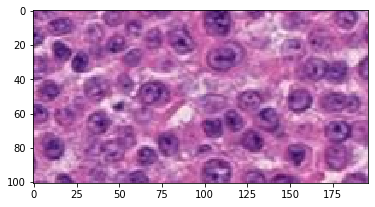

In [17]:
plt.imshow(I)

In [18]:
from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn.nucleus import NucleusInferenceConfig
import tensorflow as tf

config = NucleusInferenceConfig()
LOGS_DIR = "/tmp/nn/logs"
# Create model in inference mode
with tf.device("/gpu:1"):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)
    weights_path = "/opt/ODA/weights/mask_rcnn_nucleus_0040.h5"
    model.load_weights(weights_path, by_name=True)

In [16]:
r = model.detect([I])[0]
visualize.display_instances(
            I, r['rois'], r['masks'], r['class_ids'],
            ['BG', 'nucleus'], r['scores'],
            show_bbox=False, show_mask=False, caption_color='k', )
plt.tight_layout();

<Figure size 432x288 with 0 Axes>